In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [3]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 74.9MB/s]


In [4]:
import yaml

# Path to the YAML file
yaml_path = '/kaggle/input/license-plate-dataset/archive/dataset.yaml'

# Load the YAML
with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Fix the 'nc' value to match the number of classes
if 'names' in data:
    data['nc'] = len(data['names'])

# Save the corrected YAML (save to a new path since /kaggle/input is read-only)
corrected_yaml_path = '/kaggle/working/dataset.yaml'
with open(corrected_yaml_path, 'w') as f:
    yaml.dump(data, f)

print(f"Corrected YAML saved to: {corrected_yaml_path}")


Corrected YAML saved to: /kaggle/working/dataset.yaml


In [5]:
train_result = model.train(
    data = "/kaggle/working/dataset.yaml",
    epochs = 5,
    imgsz=640,
    device = 0
)

Ultralytics 8.3.124 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/dataset.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=No

100%|██████████| 755k/755k [00:00<00:00, 17.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/license-plate-dataset/archive/labels/train... 1525 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1526/1526 [00:04<00:00, 342.13it/s]

train: /kaggle/input/license-plate-dataset/archive/images/train/car-wbs-MH03AR5549_00000.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/license-plate-dataset/archive/images/train/car-wbs-MH03AR5549_00000.jpg'


WARNING ⚠️ train: Cache directory /kaggle/input/license-plate-dataset/archive/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 31.2±32.6 MB/s, size: 162.0 KB)


val: Scanning /kaggle/input/license-plate-dataset/archive/labels/val... 169 images, 0 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:00<00:00, 240.44it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/license-plate-dataset/archive/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.23G      1.008      2.085      1.018          9        640: 100%|██████████| 96/96 [00:18<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]


                   all        169        169          1      0.863      0.976      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.73G     0.9556      1.204     0.9737          9        640: 100%|██████████| 96/96 [00:16<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.25it/s]

                   all        169        169      0.958      0.952      0.982      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.73G      0.897     0.9698     0.9511          5        640: 100%|██████████| 96/96 [00:15<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.05it/s]

                   all        169        169      0.961      0.899      0.972      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.73G     0.8395     0.7992     0.9437         12        640: 100%|██████████| 96/96 [00:16<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.21it/s]

                   all        169        169      0.994      0.994      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.73G     0.7669     0.6872     0.9163          8        640: 100%|██████████| 96/96 [00:16<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.02it/s]

                   all        169        169      0.994      0.992      0.994      0.839



5 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.124 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.53it/s]


                   all        169        169      0.994      0.992      0.994      0.839


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


In [6]:
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")


image 1/1 /kaggle/input/test-img/0840_nevada_coupe_u-crane_AKOS0607_edit_V03-sky.jpg: 384x640 1 license_plate, 43.6ms
Speed: 2.1ms preprocess, 43.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


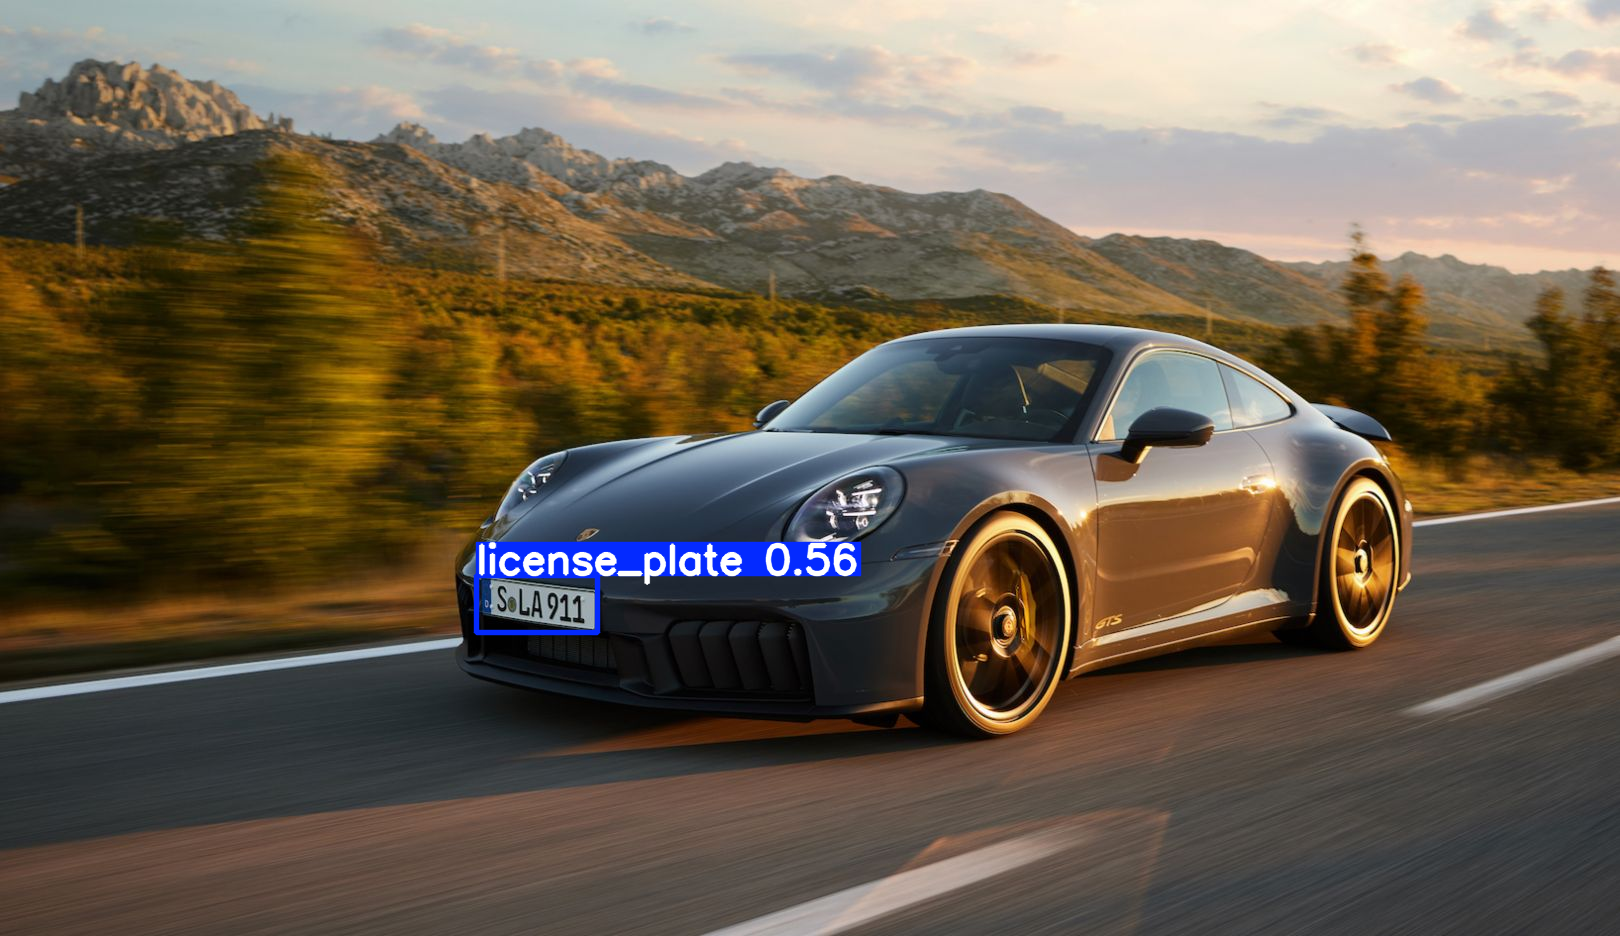

In [7]:
result = model("/kaggle/input/test-img/0840_nevada_coupe_u-crane_AKOS0607_edit_V03-sky.jpg", save=True)
result[0].show()

In [ ]:
result = model("/kaggle/input/test-video/2103099-hd_1280_720_60fps.mp4", save=True)
result[0].show()

In [9]:
!zip -r model.zip /kaggle/working/runs

  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/train/ (stored 0%)
  adding: kaggle/working/runs/detect/train/F1_curve.png (deflated 15%)
  adding: kaggle/working/runs/detect/train/train_batch0.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/train/train_batch1.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/train/train_batch2.jpg (deflated 2%)
  adding: kaggle/working/runs/detect/train/val_batch2_pred.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train/labels.jpg (deflated 34%)
  adding: kaggle/working/runs/detect/train/val_batch0_labels.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train/P_curve.png (deflated 19%)
  adding: kaggle/working/runs/detect/train/results.csv (deflated 55%)
  adding: kaggle/working/runs/detect/train/val_batch2_labels.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train/confusion_matrix.png (deflated 36%)
  adding: kaggle/working/runs/detec

In [11]:
from IPython.display import FileLink

FileLink("/kaggle/working/model.zip")

/kaggle/working/model.zip

In [ ]:
result = model("/kaggle/input/test-video/2103099-hd_1280_720_60fps.mp4", save=True)
result[0].show()


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/3600) /kaggle/input/test-video/2103099-hd_1280_720_60fps.mp4: 384x640 (no detections), 11.7ms
video 1/1 (frame 2/3600) /kaggle/input/test-video/2103099-hd_1280_720_60fps.mp4: 384x640 (no detections), 9.3ms
video 1/1 (frame 3/3600) /kaggle/input/test-video/2103099-hd_1280_720_60fps.mp4: 384x640 (no detections), 8.8ms
video 1/1 (frame 4/3600) /kaggle/input/test-video/2103099-hd_1280_720_60fps.mp4: 384x640 1 license_plate, 8.7ms
video 1